<a href="https://colab.research.google.com/github/ivansk20/LoftBlog_TrainingBot/blob/master/data%20acquisition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests      # Для запросов по API
import json          # Для обработки полученных результатов
import time          # Для задержки между запросами
import os            # Для работы с файлами
import pandas as pd  # Для формирования датафрейма с результатами

### **Зоны по странам покрытия платформой HeadHunter**

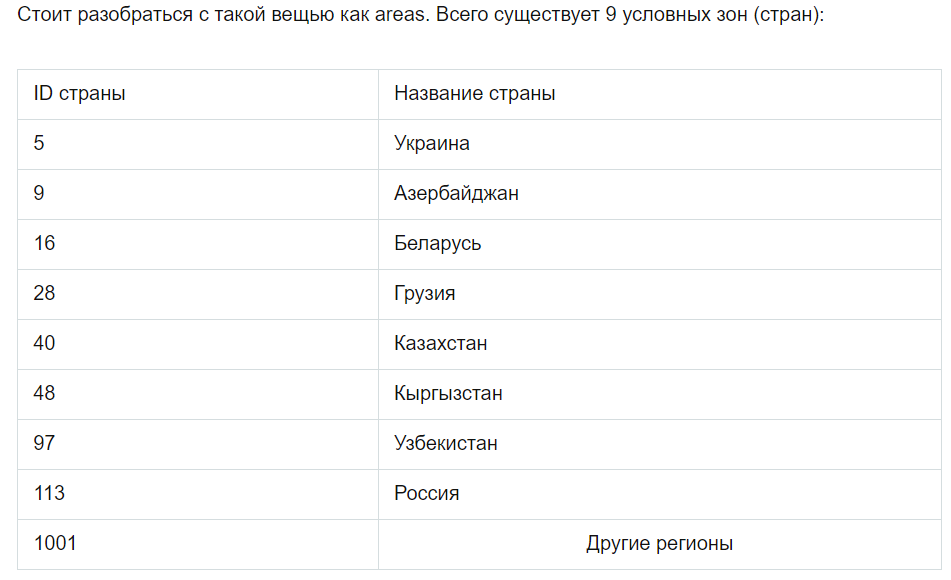

In [ ]:
url = 'https://api.hh.ru/vacancies?text=UX&search_field=name;description&order_by=publication_time&per_page=100'
firstPage = 0
lastPage = 20

#функция перебора страниц и добавление в список
def get_urls():
    listUrl = [] 
    for page in range(firstPage, lastPage):
        pageUrl = '{}&page={}'.format(url, page)
        listUrl.append(pageUrl)
    return listUrl

pages20 = get_urls()
print(len(pages20))
print(pages20[19])

20
https://api.hh.ru/vacancies?text=UX&search_field=name;description&order_by=publication_time&per_page=100&page=19


In [ ]:
params20 = []

for page in range(firstPage, lastPage):
  params = {"text": "UX ", "search_field": ["name", "description"], "order_by": "publication_time", "per_page": 100, "page": page}
  params20.append(params)

params20

In [ ]:
payload_searchV={} 
headers_searchV = {'Cookie': '__ddg1_=10U9szn55XVw9zT7kOKf'}
url = 'https://api.hh.ru/vacancies'

vids = []

for params in params20:
  response_searchV = requests.request("GET", url, params = params, headers=headers_searchV, data=payload_searchV)
  data_searchV = response_searchV.content.decode()
  jsObj_searchV = json.loads(data_searchV)
  vacantids = [sub['id'] for sub in jsObj_searchV['items']]
  vids.append(vacantids)

len(vids) # вытащил только 20 страниц

20

In [ ]:
flat_vids = []
for sublist in vids:
    for item in sublist:
        flat_vids.append(item)
len(flat_vids)

2000

In [ ]:
append_dfs = []

for id in flat_vids:
  url = f'https://api.hh.ru/vacancies/{id}'

  payload={}
  headers = {'Cookie': '__ddg1_=10U9szn55XVw9zT7kOKf'}
  
  response = requests.request("GET", url, headers=headers, data=payload)

  data = response.content.decode()
  jsObj = json.loads(data)

  df = pd.json_normalize(jsObj)
  append_dfs.append(df)
  result = pd.concat(append_dfs)

  result.to_excel('first2000.xlsx', encoding = 'utf-8') 